<a href="https://colab.research.google.com/github/AlbertoPS93/Finance/blob/main/correlacion_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando paquetes
import numpy as np
import pandas as pd
import datetime as dt

from pandas_datareader import data as pdr
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install yfinance

In [3]:
# estableciendo rango de fecha
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [4]:
# etfs a utilizar
etflist = ['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']
print(etflist)

['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI', 'FEZ']


In [5]:
# obteniendo datos desde yahoo finance
data = yf.download(etflist, start=start, end=end)
close_price = data['Close']
close_price.tail(3)

/tmp/ipython-input-2624804055.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etflist, start=start, end=end)
[*********************100%***********************]  11 of 11 completed


Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-10-15,462.553925,53.840000,62.180000,387.390015,97.099998,250.330002,63.250000,602.219971,665.169983,90.660004,68.989998
2025-10-16,459.404999,54.189999,62.740002,396.450012,97.550003,245.059998,63.400002,599.989990,660.640015,91.339996,67.809998
2025-10-17,461.779999,54.180000,62.919998,388.989990,97.389999,243.410004,63.310001,603.929993,664.390015,91.199997,67.980003


In [6]:
close_price.shape

(2715, 11)

In [7]:
# verificando datos NaN
close_price.isnull().sum()

,0
Ticker,
DIA,0
EEM,0
FEZ,0
GLD,0
IEF,0
IWM,0
MCHI,0
QQQ,0
SPY,0


In [8]:
# calculando variación procentual
change_price = close_price.pct_change().dropna()
change_price.tail(3)

Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-10-15,0.000000,0.016424,0.002580,0.017332,-0.001132,0.009802,0.010706,0.007057,0.004440,-0.002201,-0.000145
2025-10-16,-0.006808,0.006501,0.009006,0.023387,0.004634,-0.021052,0.002372,-0.003703,-0.006810,0.007500,-0.017104
2025-10-17,0.005170,-0.000185,0.002869,-0.018817,-0.001640,-0.006733,-0.001420,0.006567,0.005676,-0.001533,0.002507


In [9]:
# reordenando las columnas para dejar al SPY en la primera
change_price = change_price[['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']]
change_price

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Date,,,,,,,,,,,
2015-01-05,-0.018060,0.015708,0.015077,-0.014668,-0.013370,-0.017798,0.006102,-0.055304,-0.017422,-0.001393,-0.042628
2015-01-06,-0.009419,0.018018,0.011399,-0.013409,-0.017300,-0.004202,0.006718,-0.039383,-0.008293,-0.009564,-0.011345
2015-01-07,0.012461,-0.001975,-0.005891,0.012891,0.012315,0.021625,-0.000185,0.017729,0.012688,0.025548,0.011762
2015-01-08,0.017745,-0.013243,-0.004209,0.019140,0.016962,0.017037,-0.004078,0.009798,0.018053,0.010004,0.015027
2015-01-09,-0.008013,0.010952,0.011385,-0.006583,-0.009603,-0.003300,0.004933,-0.014555,-0.008615,-0.003302,-0.015084
...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13,0.015344,-0.000552,0.024301,0.021221,0.027840,0.029072,0.000516,0.012826,0.012773,0.031113,0.008839
2025-10-14,-0.001222,0.003202,0.007141,-0.006661,0.014279,-0.008980,0.002578,-0.018213,0.004407,-0.011374,0.006328
2025-10-15,0.004440,-0.002201,0.017332,0.007057,0.009802,0.016424,-0.001132,-0.000145,0.000000,0.010706,0.002580


In [10]:
# matriz de correlación
corr = change_price.corr()
corr

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Ticker,,,,,,,,,,,
SPY,1.000000,-0.187572,0.041047,0.933699,0.867843,0.753023,-0.162338,0.309832,0.951172,0.536534,0.797628
TLT,-0.187572,1.000000,0.292026,-0.133487,-0.166075,-0.141992,0.916336,-0.192694,-0.222517,-0.109475,-0.163896
GLD,0.041047,0.292026,1.000000,0.049911,0.040365,0.164926,0.367345,0.086430,0.018312,0.104029,0.104530
QQQ,0.933699,-0.133487,0.049911,1.000000,0.769783,0.721646,-0.116136,0.227426,0.818577,0.557598,0.710794
IWM,0.867843,-0.166075,0.040365,0.769783,1.000000,0.692984,-0.141477,0.298023,0.849674,0.501700,0.745081
EEM,0.753023,-0.141992,0.164926,0.721646,0.692984,1.000000,-0.115790,0.328344,0.719782,0.854271,0.777323
IEF,-0.162338,0.916336,0.367345,-0.116136,-0.141477,-0.115790,1.000000,-0.176834,-0.194817,-0.100270,-0.131322
USO,0.309832,-0.192694,0.086430,0.227426,0.298023,0.328344,-0.176834,1.000000,0.321198,0.218623,0.286206
DIA,0.951172,-0.222517,0.018312,0.818577,0.849674,0.719782,-0.194817,0.321198,1.000000,0.492851,0.785234


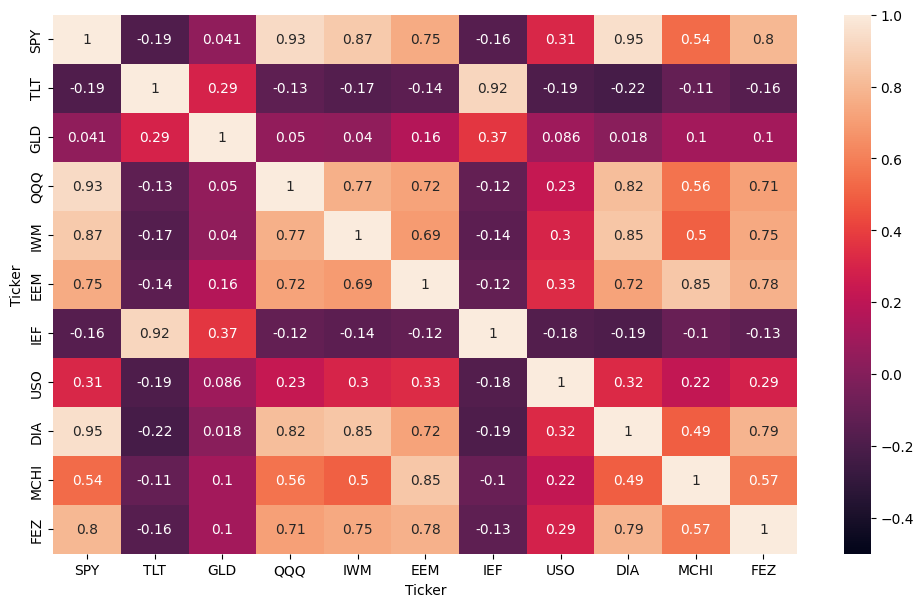

In [11]:
# graficando
plt.figure(figsize=(12, 7))
sns.heatmap(corr,
            vmax=1, vmin=-.5,
            fmt='.2g',
            annot=True);

In [12]:
# Implementando rolling window correlation para estudiar cómo varían las relaciones en el tiempo 1. Lista de tickers
tickers = ['SPY','TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI', 'FEZ']

# 2. Descarga de precios
all_data = yf.download(tickers, start='2018-01-01', end='2025-10-01')

# 3. Sección de "Close"
df = all_data['Close']

# 4. Cálculo de retornos (ahora funcionará sin error)
returns = df.pct_change().dropna()

# 5. Imprimiendo las primeras filas para verificar
print("Precios de Cierre (ya ajustados):")
print(df.head())

print("\nRetornos calculados:")
print(returns.head())

/tmp/ipython-input-744508998.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(tickers, start='2018-01-01', end='2025-10-01')
[*********************100%***********************]  11 of 11 completed

Precios de Cierre (ya ajustados):
Ticker             DIA        EEM        FEZ         GLD        IEF  \
Date                                                                  
2018-01-02  213.520172  40.555485  32.810196  125.150002  88.331802   
2018-01-03  214.320877  40.944069  32.938583  124.820000  88.424164   
2018-01-04  215.741364  41.146797  33.524342  125.459999  88.382195   
2018-01-05  217.566513  41.501595  33.861359  125.330002  88.273056   
2018-01-08  217.454483  41.501595  33.724941  125.309998  88.231071   

Ticker             IWM       MCHI         QQQ         SPY         TLT  \
Date                                                                    
2018-01-02  139.598022  60.221481  150.605408  237.909119  101.690498   
2018-01-03  139.743164  60.700607  152.068710  239.413971  102.176712   
2018-01-04  140.115067  61.075191  152.334824  240.423019  102.160484   
2018-01-05  140.405304  61.510777  153.864700  242.025162  101.868767   
2018-01-08  140.622971  61.815

In [13]:
# 1. Descarga de precios
tickers = ['SPY', 'EFA', 'IWM', 'TLT']
df = yf.download(tickers, start='2018-01-01', end='2025-10-18')['Close']

# 2. Cálculo de retornos
returns = df.pct_change().dropna()


/tmp/ipython-input-454492578.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2018-01-01', end='2025-10-18')['Close']
[*********************100%***********************]  4 of 4 completed


In [14]:
window = 60  # Ventana de 60 días

# Correlación móvil SPY vs TLT
rolling_pair = (
    returns['SPY']
    .rolling(window=window)
    .corr(returns['TLT'])
)

In [15]:
window = 60

# devuelve un DataFrame con índice (fecha, ticker1) y columna ticker2
rolling_full = returns.rolling(window=window).corr()

# Para convertirlo en un panel fecha × par de tickers:
rolling_matrix = (
    rolling_full
    .unstack(level=-1)                # convierte columnas de multiíndice en columnas planas
    .dropna(axis=0, how='all')        # elimina fechas sin datos completos
)

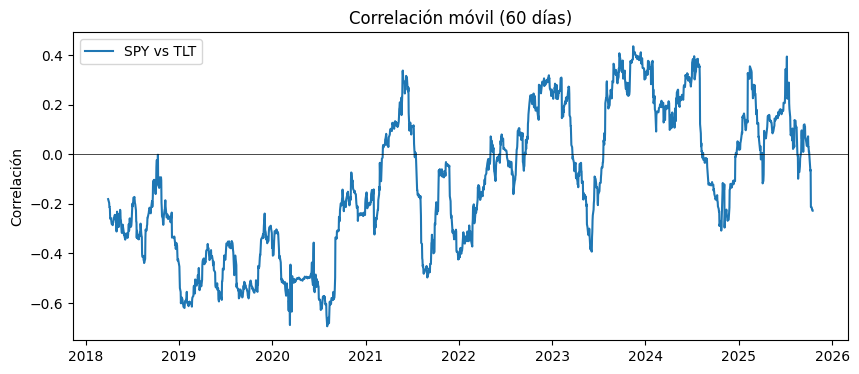

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(rolling_pair.index, rolling_pair.values, label='SPY vs TLT')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Correlación móvil (60 días)')
plt.ylabel('Correlación')
plt.legend()
plt.show()